# DSCI 632 Final

Your final is to use the dataset of your choice and the techniques in this class to do the following:

1. Define and describe the dataset (10 points)
1. Clean the data (10 points)
1. Transform the clean data (10 points)
1. Show your analysis of the data (10 points)

## Ground Rules

1. Explain everything you're doing with pyspark in the code cells using [markdown](https://www.markdownguide.org/cheat-sheet) in text cells. Help the reader understand why you're doing each step so they can re-create it. Remember, this is an assignment to show how you analyze data to a potential employer. Don't use code comments to explain things.
1. All of the sections are heading 1 in markdown, so use heading 2 to write your explainations, and heading 3 for any sub-headers. Check in your table of contents view in colab to make sure each point is listed before you turn this in.
1. Don't hesisate to use multiple code/text cells in each section, as long as they're all labeled and described.
1. Assume that the reader doesn't have access to the dataset on your local machine. Provide a link to the dataset you're using, or if able, include code to copy it from a public source. Don't rely on uploading from your local machine. (Importing from Google Drive is ok, as long as you provide the link to the data)
1. If using GCP services, include screenshots from your console if there's a step that you aren't able to re-produce in code. Using the SDK is always preferred, but you won't lose points for using screenshots and explaining them.
1. Import the data ONCE, then transform it to fit your analysis.
1. Don't overwrite data, make new columns for new transformations. You can always drop columns later, but you can't get overwritten values back.
1. Feel free to work with classmates, but all work submitted must be your own.
1. Make sure to run disconnect the runtime and re-run the notebook at least once before turning in. If you are getting certain Java runtime errors, this might also help.

## Extra Credit Opportunities!

- If you provide a link to this notebook on your public GitHub page instead of turning it in as an attachment, you will get 2 points extra credit.
- Extra credit will be given for using the [Google Cloud SDK](https://cloud.google.com/sdk/) to create/use/destroy any cloud resources, up to 2 points per section, 8 points total.
 - Don't be afraid to look at the GCP example colab notebooks from the class notes, the GCP documentation, or GitHub for examples.
- If this notebook is self-contained, you will get 5 points extra credit. (Requirements below)
 - The data is imported without relying on Google Drive, as the paths to data in Google Drive are user-specific. Downloads from public storage buckets/services are fine. (1 point)
 - It be run from start to finish without making any changes to paths, code, or variable names. (1 point)
 - All calls to external services, including GCP, are done programatically, no screenshots explaining how it worked in a browser console. (Using an API or SDK, 2 points)
 - All cloud resources are destroyed at the end of the notebook in a seperate section (Also via API or SDK, 1 point)

---

# Section 1: Define and describe the dataset

10 points

Import the dataset, and describe why you'll be analyzing in it. You can summarize a few columns, show a more information on the relavent features, or but help the reader understand what the dataset is, what is in it, and why you picked it.

Some questions that it might help you to answer:
1. Why are you choosing this dataset?
1. What variables will you use?
1. What analysis(es) will you run?
1. Do you have any hypotheses? What are they?

### This section should include one or more of the following:
- A histogram of several features relavent to your analysis
- The schema of the dataset, with the datatypes assigned correctly
- A text cell with explainations of the relavent features in [markdown](https://www.markdownguide.org/cheat-sheet)
- Use Spark SQL or built-in methods to show a range of values
- Most common words/n-grams found

## California Housing Prices Introduction

 I will be creating a predictive model as an attempt to predict the housing prices from the California Housing Prices dataset, which can be downloaded from the following website location https://www.kaggle.com/datasets/camnugent/california-housing-prices

 The reason why I am choosing this dataset I am interested in learning Machine Learning and predictive modeling and I also have a theory that I want to test, which is  where are the most expensive houses and see how accurately a machine learning model is for predicting housing prices.





---



## Colab
 - Google Colab is free you just need to sign up for a Google email account which can be found [here](https://support.google.com/mail/answer/56256?hl=en)

 - Afterwards goto [Google Drive located here](https://www.google.com/drive/), click on Goto Drive and create a directory called HousingPrices

 - Run the below code which will allow colab to access your Google Drive

In [205]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Install Spark
 - This will install Spark 3.2.4

In [206]:

!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.2.4/spark-3.2.4-bin-hadoop2.7.tgz
!tar xf spark-3.2.4-bin-hadoop2.7.tgz

## Set Environment Variables
 - We will need to install Java and Spark
 - Also sets enviroment variables for JAVA and SPARK in order to operate properly

In [207]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.4-bin-hadoop2.7"

In [208]:
!python -m pip install --upgrade pyspark==2.4.0
!python -m pip install -q findspark

## Initializing the spark context

In [209]:
import findspark
findspark.init()

In [210]:
from pyspark.sql import SparkSession

## Create an application
 - You can change this to anything you like for your project

 - Just update APP_NAME = "Your Project NAME"

In [211]:
APP_NAME = "Final Project"
spark = SparkSession.builder.appName(APP_NAME).getOrCreate()

## Verifying that Spark is running

In [212]:
spark

### Importing required modules

In [213]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext
from pyspark.sql.types import *
import pyspark.sql.functions as F
from pyspark.sql.functions import udf, col

from pyspark.ml.regression import LinearRegression
from pyspark.mllib.evaluation import RegressionMetrics

from pyspark.ml.tuning import ParamGridBuilder, CrossValidator, CrossValidatorModel
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.evaluation import RegressionEvaluator


## Creating a Spark dataset for we are able to use Spark Machine learning features

- Change the housing_data variable path to your Google drive path.

- Easy way to find the path is to click on "Files" folder on the left menu sidebar, locate the directory folder and left click on the file and it will give you a menu to "Copy Path"

- After paste the path into housing_data = ('YOUR PATH GOES HERE/housing.csv')

In [214]:

housing_data = ('/content/drive/MyDrive/Colab Notebooks/DSCI 632/Final/housing.csv')

cal_housing = spark.read.format('csv').option('header', 'true').option('inferSchema', 'true').load(housing_data)
cal_housing.show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1274.0|         235.0|     558.0|     219.0|       5.6431|          341300.0|       NEAR BAY|
|  -122.25|   37.85|              

# Displaying pyspark dataframe.  

- This will give us an idea of what data types are in each field.

- We can see bleow that ocean_proxmity is a string in which latter on we will have to covert to a numerical in order for our ML to process this dataset

In [215]:
cal_housing.printSchema()

root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: double (nullable = true)
 |-- total_rooms: double (nullable = true)
 |-- total_bedrooms: double (nullable = true)
 |-- population: double (nullable = true)
 |-- households: double (nullable = true)
 |-- median_income: double (nullable = true)
 |-- median_house_value: double (nullable = true)
 |-- ocean_proximity: string (nullable = true)



# Reviewing entries in each column

- This part is called Exploratory Data Analysis and the purpose is to identify and issues with the data.  Such as NULL values, missing information.

- These null values can create problems in data analysis, machine learning, and other data-related tasks and is the reason why we have to be careful on how we handle them

-  One common approach to handle null values is to delete the rows that contain them.


In [216]:
cal_housing.select(['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms']).describe().show()

+-------+-------------------+-----------------+------------------+------------------+------------------+
|summary|          longitude|         latitude|housing_median_age|       total_rooms|    total_bedrooms|
+-------+-------------------+-----------------+------------------+------------------+------------------+
|  count|              20640|            20640|             20640|             20640|             20433|
|   mean|-119.56970445736148| 35.6318614341087|28.639486434108527|2635.7630813953488| 537.8705525375618|
| stddev|  2.003531723502584|2.135952397457101| 12.58555761211163|2181.6152515827944|421.38507007403115|
|    min|            -124.35|            32.54|               1.0|               2.0|               1.0|
|    max|            -114.31|            41.95|              52.0|           39320.0|            6445.0|
+-------+-------------------+-----------------+------------------+------------------+------------------+



## Discovering NULL Values

- Here we have found under column ocean_proxmity some null values in which we will have to handle latter on in this project

- Also ocean_proxmity is a catagorical variable and will need to convert to numerical

- Reason we convert Categorical data to numerical data is our machine learning algorithms, as most algorithms are primarily designed to operate with numerical data only

In [217]:
cal_housing.select(['population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']).describe().show()

+-------+------------------+-----------------+------------------+------------------+---------------+
|summary|        population|       households|     median_income|median_house_value|ocean_proximity|
+-------+------------------+-----------------+------------------+------------------+---------------+
|  count|             20640|            20640|             20640|             20640|          20640|
|   mean|1425.4767441860465|499.5396802325581|3.8706710029070246|206855.81690891474|           null|
| stddev|  1132.46212176534|382.3297528316098| 1.899821717945263|115395.61587441359|           null|
|    min|               3.0|              1.0|            0.4999|           14999.0|      <1H OCEAN|
|    max|           35682.0|           6082.0|           15.0001|          500001.0|     NEAR OCEAN|
+-------+------------------+-----------------+------------------+------------------+---------------+



## Performing a more indepth review of find NULL values and missing informaiton

- NULL values in ocean_proxmity and total_bedrooms
- total_bedroom = 207
- ocean_proxmity = 20640



In [218]:
for column in cal_housing.columns:
    print (column, cal_housing.filter(col(column).cast("float").isNull()).count())

longitude 0
latitude 0
housing_median_age 0
total_rooms 0
total_bedrooms 207
population 0
households 0
median_income 0
median_house_value 0
ocean_proximity 20640


## Idenitfy Target Variable for Predictive Modeling

- Creating a histogram on median_house_value since this will be our target variable for performing our price prediction.

- Checking if the prices are normally distributed.

- This is a good reference for understanding what a normal distribution is https://www.datacamp.com/tutorial/understanding-skewness-and-kurtosis

- In our case the price column is right skewed with an outlier at the 500,000




<ipython-input-219-024e676bb7b9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cal_housing.select('median_house_value').toPandas(), color="skyblue")


+----------------------------+----------------------------+
|skewness(median_house_value)|kurtosis(median_house_value)|
+----------------------------+----------------------------+
|          0.9776922140978437|          0.3275001388119674|
+----------------------------+----------------------------+



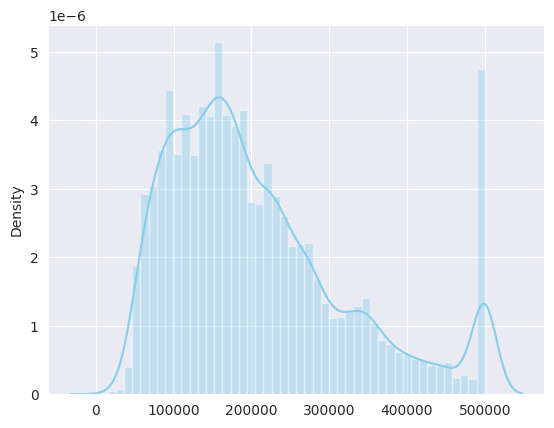

In [219]:
sns.distplot(cal_housing.select('median_house_value').toPandas(), color="skyblue")
cal_housing.select(F.skewness('median_house_value'), F.kurtosis('median_house_value')).show()

# Section 2: Clean the data

10 points

Not every dataset is going to be ready to use right away. Take steps to fix incorrect inputs, remove null values, and assign datatypes that fit each feature.

### This section should include one or more of the following:
- A count of rows before and after dropping data with null or incorrect values, including an explaination of why removing the rows was necessary in [markdown](https://www.markdownguide.org/cheat-sheet).
- Renaming a column, adding a new one, or casting an existing one as a different datatype.
- Remove punctuation marks, symbols, etc from the data, and convert all upper-case lettering to lower-case.
- Remove or fix rows that have bad values/data.

## Renaming Columns

- For a more clean pricture of what we are going to predict , which is price

- We will be renaming median_house_value to price

In [220]:
cal_housing.select('median_house_value').show(5)

+------------------+
|median_house_value|
+------------------+
|          452600.0|
|          358500.0|
|          352100.0|
|          341300.0|
|          342200.0|
+------------------+
only showing top 5 rows



### Below is how we rename a pyspark column
- Renaming median_house_value to price

In [221]:
cal_housing = cal_housing.withColumnRenamed('median_house_value','price')

In [222]:
cal_housing.select('price').show(5)

+--------+
|   price|
+--------+
|452600.0|
|358500.0|
|352100.0|
|341300.0|
|342200.0|
+--------+
only showing top 5 rows



### Displaying the updated column name

In [223]:
cal_housing.show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+--------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|   price|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+--------+---------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|452600.0|       NEAR BAY|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|358500.0|       NEAR BAY|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|352100.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1274.0|         235.0|     558.0|     219.0|       5.6431|341300.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1627.0|         280.0|     565.0|     259.0|       3.8462|34

## Investigating outliers

- Housing prices greater than 500,000 (expensive houses)

In [224]:
print("No of houses: %i" % cal_housing.select('price').count())
print("No of houses greater than $500000 are: %i" % cal_housing.filter(cal_housing["price"] > 500000).count())

No of houses: 20640
No of houses greater than $500000 are: 965


## Reviewing Distribution of Prices

- Majority of the prices range from 50,000 to 300,000

- Prices are over 300,000 are the outliers


<Axes: ylabel='Count'>

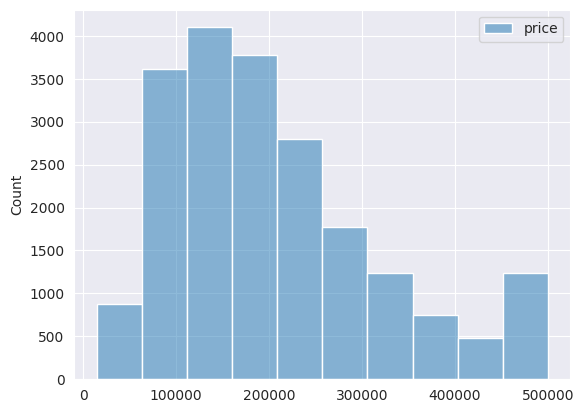

In [225]:
sns.set_style("darkgrid")
sns.histplot(cal_housing.select('price').toPandas(), bins = 10)

## Reviewing Ocean Proximity
- A few catagories to review
  - ISLAND
  - NEAR OCEAN
  - < 1H OCEAN
  - INLAND

In [226]:
cal_housing.select('ocean_proximity').distinct().show()

+---------------+
|ocean_proximity|
+---------------+
|         ISLAND|
|     NEAR OCEAN|
|       NEAR BAY|
|      <1H OCEAN|
|         INLAND|
+---------------+



# Most expensive houses
 - Located near the ocean

<Axes: xlabel='ocean_proximity', ylabel='avg(median_income)'>

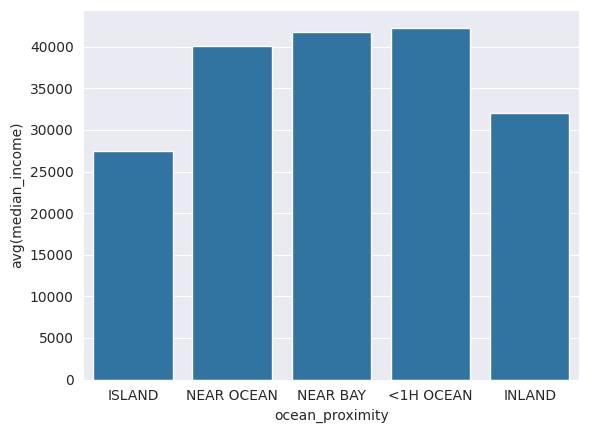

In [227]:
df_i = cal_housing.groupby('ocean_proximity').agg({'median_income' : 'avg'})
df_p = df_i.toPandas()
sns.barplot(x = df_p['ocean_proximity'], y = df_p['avg(median_income)']*10000)

## Handling Null values in total _bedroom
 - We could have drop 207 rows of data,  however that much data loss will affect our predicted results. A better way of handling these nulls is to take the mean(average) and fill the nulls with this mean value.

In [228]:
mean = cal_housing.select(F.mean('total_bedrooms')).collect()[0][0]

### Reviewing the mean value

In [229]:
mean

537.8705525375618

### Filling the total_bedrooms that are nulls with mean value



In [230]:
cal_housing = cal_housing.na.fill({'total_bedrooms': mean})

In [231]:
cal_housing.show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+--------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|   price|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+--------+---------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|452600.0|       NEAR BAY|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|358500.0|       NEAR BAY|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|352100.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1274.0|         235.0|     558.0|     219.0|       5.6431|341300.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1627.0|         280.0|     565.0|     259.0|       3.8462|34

## Checking if nulls values exist in 'total_bedrooms' columns

- Looks like our filling with the mean values worked for total_bedroom

In [232]:
#Checking if na values exist in 'total_bedrooms' columns
cal_housing.filter(col('total_bedrooms').isNull()).show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+-----+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|price|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+-----+---------------+
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+-----+---------------+



In [233]:
for column in cal_housing.columns:
    #print(column, cal_housing.filter(col(column).cast("float").isin([None,np.nan])).count())
    print (column, cal_housing.filter(col(column).cast("float").isNull()).count())


longitude 0
latitude 0
housing_median_age 0
total_rooms 0
total_bedrooms 0
population 0
households 0
median_income 0
price 0
ocean_proximity 20640


# Section 3: Transform the clean data

10 points

Once you have clean data, start to prepare it to fit your analysis tools. This might mean using custom code to normalize certain values, joining supplemental datasets, and/or preparing it for machine learning.

### This section should include one or more of the following:
- Write a UDF to perform a function, then use it to add a new column to your data. Explain why in [markdown](https://www.markdownguide.org/cheat-sheet)
- Join an outside data source. (It can be one you've prepared alongside the primary source you're using, as long as you link it)
- Split the data into train/test sets
- Create vectors for relavent features
- One-hot encode catagorical variables

## Label-encoding for the "ocean_proximity" column
- Converting catagorical column ocean_promximity into a numerical column

- Reason we convert Categorical data to numerical data is our machine learning algorithms, as most algorithms are primarily designed to operate with numerical data only

- We will be using StringIndexer which will allows us to convert the ocean_proxmity columns to a numerical data

### First lets check for null values for ocean_proximity

In [234]:
for column in cal_housing.columns:
    print (column, cal_housing.filter(col(column).cast("float").isNull()).count())

longitude 0
latitude 0
housing_median_age 0
total_rooms 0
total_bedrooms 0
population 0
households 0
median_income 0
price 0
ocean_proximity 20640


### Using StringIndexer to correct these Nulls values for ocean_proxmity

- Removed nulls from ocean_proxmity
- We renamed ocean_proxmity columns to ocean_proxmity_index

- ocean_proxmity_index is the numerical represenation of the categorical column ocean_proxmity

In [235]:
for column in cal_housing.columns:
    print (column, cal_housing.filter(col(column).cast("float").isNull()).count())

longitude 0
latitude 0
housing_median_age 0
total_rooms 0
total_bedrooms 0
population 0
households 0
median_income 0
price 0
ocean_proximity 20640


In [236]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="ocean_proximity", outputCol="ocean_proximity_index")
cal_housing = indexer.fit(cal_housing).transform(cal_housing)
cal_housing = cal_housing.drop('ocean_proximity')
cal_housing.select('ocean_proximity_index').show(3)

+---------------------+
|ocean_proximity_index|
+---------------------+
|                  3.0|
|                  3.0|
|                  3.0|
+---------------------+
only showing top 3 rows



## Determine features using Correlation heatmap

- Identify which features to include in the predictive model

- We will use a correlation heatmap.  Not sure what correlation is [click here to read more
](https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-correlation.html#:~:text=What%20is%20correlation%3F,statement%20about%20cause%20and%20effect.)
- Highly correlated features improved the preditive power of our model
- The code below performs the following
  - Convert to vector column first
  - Gets a correlation matrix
  - Converts dataframe to pandas in order to plot
  - Finally plots that matrix

/content/spark-3.2.4-bin-hadoop2.7/python/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


<Axes: >

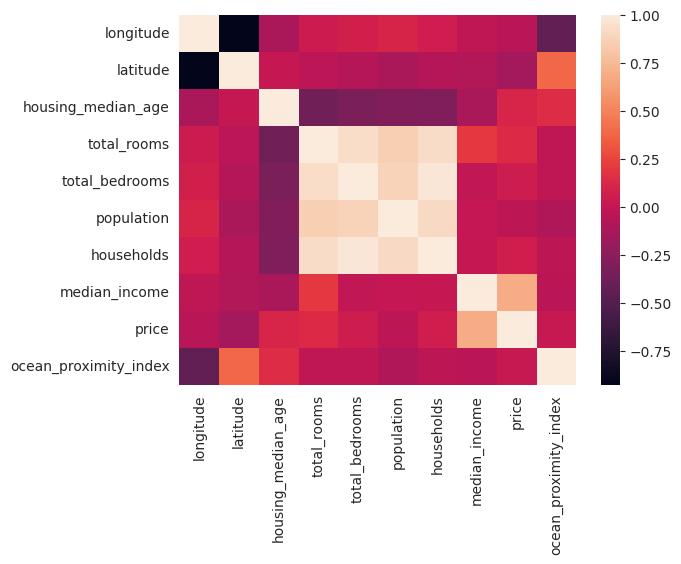

In [237]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler


assembler = VectorAssembler(inputCols=cal_housing.columns, outputCol="features")
df_vector = assembler.transform(cal_housing).select("features")

matrix = Correlation.corr(df_vector, 'features')
corrmatrix = matrix.collect()[0][0].toArray().tolist()

df_corr = pd.DataFrame(corrmatrix, columns = cal_housing.columns, index = cal_housing.columns)


sns.heatmap(df_corr)

## Select only correlated columns

  - housing_median_age
  - population
  - total_rooms
  - total_bedrooms
  - median_income
  - price

In [238]:
df_model = cal_housing.select(['housing_median_age','population','total_rooms','total_bedrooms','median_income','price'])
df_model.show(3)

+------------------+----------+-----------+--------------+-------------+--------+
|housing_median_age|population|total_rooms|total_bedrooms|median_income|   price|
+------------------+----------+-----------+--------------+-------------+--------+
|              41.0|     322.0|      880.0|         129.0|       8.3252|452600.0|
|              21.0|    2401.0|     7099.0|        1106.0|       8.3014|358500.0|
|              52.0|     496.0|     1467.0|         190.0|       7.2574|352100.0|
+------------------+----------+-----------+--------------+-------------+--------+
only showing top 3 rows



## Normal Distribution
 - What is a normal distribution,  [Click here to read more](https://www.investopedia.com/articles/active-trading/092914/normal-distribution-table-explained.asp)

## Checking normal distribution of selected features housing_median_age
- housing_median_age is normally distributed

<ipython-input-239-558cab34c4ee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cal_housing.select('housing_median_age').toPandas(), color="skyblue")


+------------------+------------------+
|   skewness(price)|   kurtosis(price)|
+------------------+------------------+
|0.9776922140978437|0.3275001388119674|
+------------------+------------------+



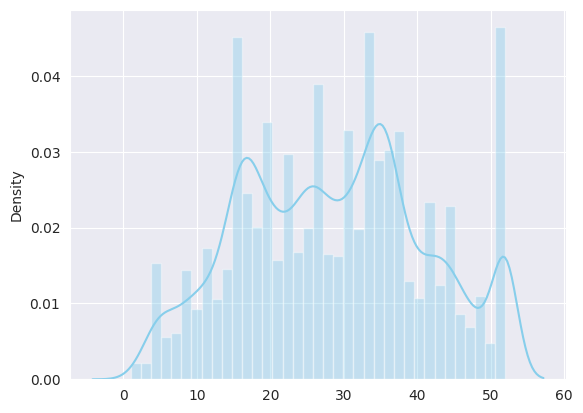

In [239]:
sns.distplot(cal_housing.select('housing_median_age').toPandas(), color="skyblue")
cal_housing.select(F.skewness('price'), F.kurtosis('price')).show()

## Checking normal distribution of selected features total_rooms
total_rooms is not normally distributed

<ipython-input-240-20a08663eeab>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cal_housing.select('total_rooms').toPandas(), color="skyblue")


+---------------------+---------------------+
|skewness(total_rooms)|kurtosis(total_rooms)|
+---------------------+---------------------+
|    4.147042038773302|    32.62273207294906|
+---------------------+---------------------+



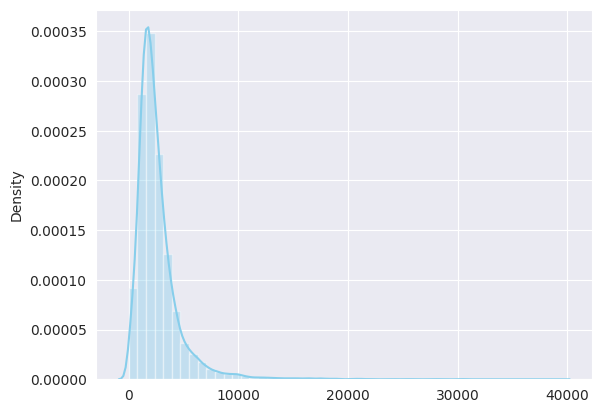

In [240]:
sns.distplot(cal_housing.select('total_rooms').toPandas(), color="skyblue")
df_model.select(F.skewness('total_rooms'), F.kurtosis('total_rooms')).show()



### Checking normal distribution of selected features total_bedrooms
- total_bedrooms is not normally distributed

<ipython-input-241-63915b8524e9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cal_housing.select('total_bedrooms').toPandas(), color="skyblue")


+------------------------+------------------------+
|skewness(total_bedrooms)|kurtosis(total_bedrooms)|
+------------------------+------------------------+
|       3.476770679879877|      22.232965049370016|
+------------------------+------------------------+



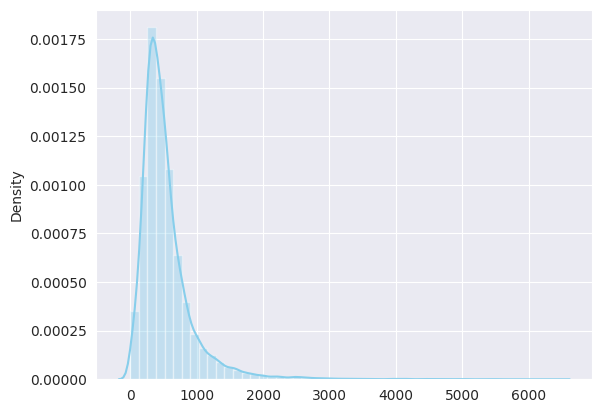

In [241]:
sns.distplot(cal_housing.select('total_bedrooms').toPandas(), color="skyblue")
df_model.select(F.skewness('total_bedrooms'), F.kurtosis('total_bedrooms')).show()

## Using lograthimic scale to normalize the data for total_rooms & total_bedrooms

- Why we will be reducing the impact of outliers that we have indentified and also transforming the skewed data to approximate normality

- You can read more about [lograthimic scale here](https://campus.datacamp.com/courses/preprocessing-for-machine-learning-in-python/standardizing-data?ex=4)


<ipython-input-242-36306d040bd6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_model.select('total_rooms_log').toPandas(), color="skyblue")


+-------------------------+-------------------------+
|skewness(total_rooms_log)|kurtosis(total_rooms_log)|
+-------------------------+-------------------------+
|      -1.0972584854175316|         5.25204961078785|
+-------------------------+-------------------------+



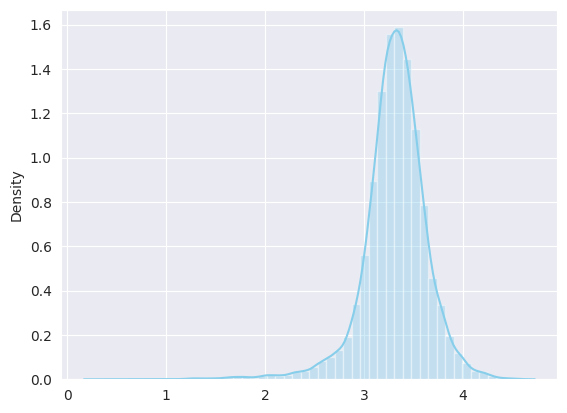

In [242]:

df_model = df_model.withColumn("total_rooms_log", F.log10(col("total_rooms")))

sns.distplot(df_model.select('total_rooms_log').toPandas(), color="skyblue")
df_model.select(F.skewness('total_rooms_log'), F.kurtosis('total_rooms_log')).show()


<ipython-input-243-18e8414aad4d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_model.select('total_bedrooms_log').toPandas(), color="skyblue")


+----------------------------+----------------------------+
|skewness(total_bedrooms_log)|kurtosis(total_bedrooms_log)|
+----------------------------+----------------------------+
|         -1.0805050813078412|           5.178808742167776|
+----------------------------+----------------------------+



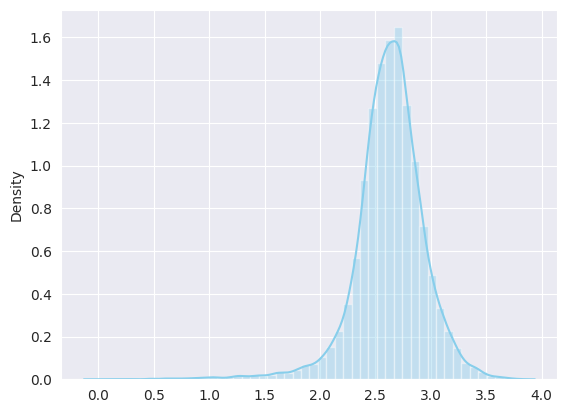

In [243]:

df_model = df_model.withColumn("total_bedrooms_log", F.log10(col("total_bedrooms")))

sns.distplot(df_model.select('total_bedrooms_log').toPandas(), color="skyblue")
df_model.select(F.skewness('total_bedrooms_log'), F.kurtosis('total_bedrooms_log')).show()


### Checking normal distribution of selected fetures

- median_income is normally distributed

<ipython-input-244-8f843996c88c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cal_housing.select('median_income').toPandas(), color="skyblue")


+-----------------------+-----------------------+
|skewness(median_income)|kurtosis(median_income)|
+-----------------------+-----------------------+
|     1.6465370299001063|      4.951033760409806|
+-----------------------+-----------------------+



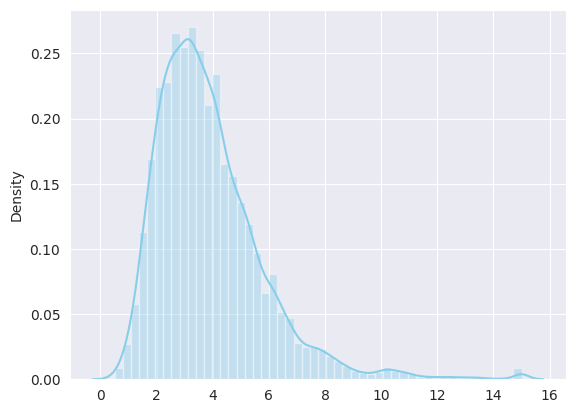

In [244]:
sns.distplot(cal_housing.select('median_income').toPandas(), color="skyblue")
cal_housing.select(F.skewness('median_income'), F.kurtosis('median_income')).show()

### Checking normal distribution of selected features population
- population is not normally distributed

<ipython-input-245-d436f292f557>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cal_housing.select('population').toPandas(), color="skyblue")


+--------------------+--------------------+
|skewness(population)|kurtosis(population)|
+--------------------+--------------------+
|   4.935499508858543|    73.5350088192234|
+--------------------+--------------------+



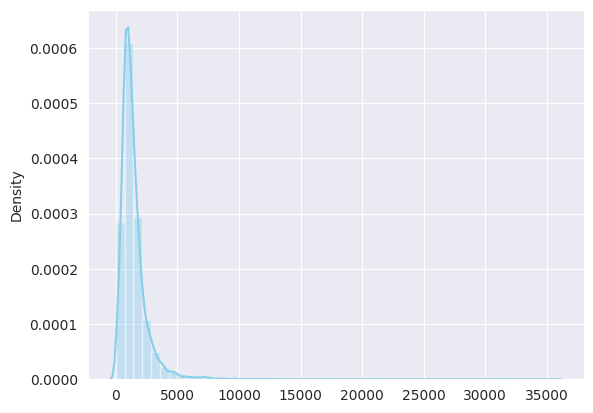

In [245]:

sns.distplot(cal_housing.select('population').toPandas(), color="skyblue")
df_model.select(F.skewness('population'), F.kurtosis('population')).show()


### Using lograthimic scale to normalize the data for population


<ipython-input-246-32fc1f4a8136>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_model.select('population_log').toPandas(), color="skyblue")


+------------------------+------------------------+
|skewness(population_log)|kurtosis(population_log)|
+------------------------+------------------------+
|     -1.0707082805861496|       4.668771428771045|
+------------------------+------------------------+



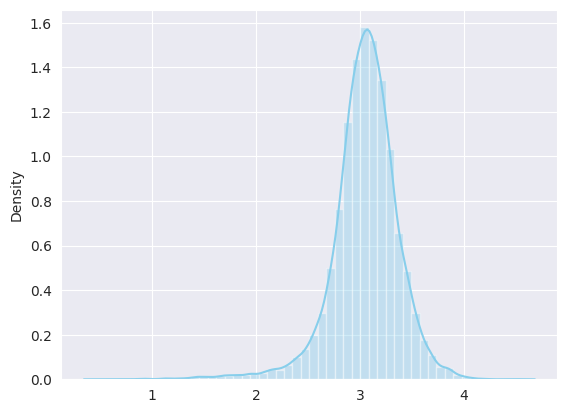

In [246]:

df_model = df_model.withColumn("population_log", F.log10(col("population")))

sns.distplot(df_model.select('population_log').toPandas(), color="skyblue")
df_model.select(F.skewness('population_log'), F.kurtosis('population_log')).show()


## Assembling features
 - Why is this important.  These are the building block of a dataset and the quality of the feature has a major impact of the quality of our predictions.

 - Also is why we used a corelation heatmap to help us determine what the best features are



In [247]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

feature_assembly = VectorAssembler(inputCols = ['housing_median_age','total_rooms_log','total_bedrooms_log','population_log','median_income'], outputCol = 'features')
output = feature_assembly.transform(df_model)
output.show(3)

+------------------+----------+-----------+--------------+-------------+--------+------------------+------------------+------------------+--------------------+
|housing_median_age|population|total_rooms|total_bedrooms|median_income|   price|   total_rooms_log|total_bedrooms_log|    population_log|            features|
+------------------+----------+-----------+--------------+-------------+--------+------------------+------------------+------------------+--------------------+
|              41.0|     322.0|      880.0|         129.0|       8.3252|452600.0|2.9444826721501687| 2.110589710299249| 2.507855871695831|[41.0,2.944482672...|
|              21.0|    2401.0|     7099.0|        1106.0|       8.3014|358500.0|3.8511971761741606|3.0437551269686796|3.3803921600570273|[21.0,3.851197176...|
|              52.0|     496.0|     1467.0|         190.0|       7.2574|352100.0| 3.166430113843283| 2.278753600952829|2.6954816764901977|[52.0,3.166430113...|
+------------------+----------+---------

## Selecing what we want to predict against our feature set

In [248]:
df_model_final = output.select(['price', 'features'])
df_model_final.show(3)

+--------+--------------------+
|   price|            features|
+--------+--------------------+
|452600.0|[41.0,2.944482672...|
|358500.0|[21.0,3.851197176...|
|352100.0|[52.0,3.166430113...|
+--------+--------------------+
only showing top 3 rows



# Section 4: Show your analysis of the data

10 points

This is where the science happens. Use your data to show some kind of insight, and how you got there. Make the reader understand why it's important, and how they can get the same conslusion, and/or what would need to change to reach a different one.

### This section should include one or more of the following:
- Fit the data to a model
- Show the outcome of clustering, regression, and/or classification algorithms.
 - We used several in class, but you can use whatever fits your needs for this assignment
- Reccomend a product/item
- Use a SQL query to filter results


## Creating a training and testing set

In [249]:

df_train, df_test = df_model_final.randomSplit([0.70, 0.30])

## Using LinearRegression for our prediction for our training dataset

In [250]:
from pyspark.ml.regression import LinearRegression


house_lr = LinearRegression(featuresCol = 'features', labelCol = 'price')
trained_house_model = house_lr.fit(df_train)
house_results = trained_house_model.evaluate(df_train)

## Displaying our predicted training results

In [251]:
predictions = trained_house_model.transform(df_train)
predictions.sort('price').show(5)

+-------+--------------------+------------------+
|  price|            features|        prediction|
+-------+--------------------+------------------+
|14999.0|[36.0,1.991226075...|114671.59580713787|
|14999.0|[16.0,2.406540180...|117190.82809971635|
|14999.0|[52.0,2.904715545...| 307613.2551943768|
|17500.0|[39.0,2.692846919...|207408.52286670983|
|22500.0|[8.0,3.9989129043...| 92151.07009847477|
+-------+--------------------+------------------+
only showing top 5 rows



## Using LinearRegression for our prediction for our test dataset

In [252]:
from pyspark.ml.regression import LinearRegression

house_lr = LinearRegression(featuresCol = 'features', labelCol = 'price')
trained_house_model = house_lr.fit(df_test)
house_results = trained_house_model.evaluate(df_test)

## Displaying our predicted test results

In [253]:
predictions = trained_house_model.transform(df_test)
predictions.sort('price').show(5)

+-------+--------------------+------------------+
|  price|            features|        prediction|
+-------+--------------------+------------------+
|14999.0|[19.0,2.791690649...|160232.10441483415|
|22500.0|[52.0,2.926856708...| 194809.3823757667|
|26600.0|[34.0,3.158362492...|134723.07037640654|
|27500.0|[17.0,1.986771734...| 71469.89714361329|
|28300.0|[29.0,4.248904650...|133801.69628562272|
+-------+--------------------+------------------+
only showing top 5 rows



## Understanding what our predictions mean
- MSE - Mean Squared Error (MSE) measures the amount of error in a statistical model. THe lower the value , the better the model is

- Here is a [link to read up on MSE](https://statisticsbyjim.com/regression/mean-squared-error-mse/#:~:text=Mean%20squared%20error%20(MSE)%20measures,error%20increases%2C%20its%20value%20increases.)

- R2 - Tell us how well our data fit the regression model.  Below we see that our R2 is 58%. More information on [R2 click here](https://corporatefinanceinstitute.com/resources/data-science/r-squared/)




In [254]:
pred_results = trained_house_model.evaluate(df_train)
print("The MSE for the model is: %2f"% pred_results.meanAbsoluteError)
print("The r2 for the model is: %2f"% pred_results.r2)

The MSE for the model is: 54724.949900
The r2 for the model is: 0.570399


In [255]:
pred_results = trained_house_model.evaluate(df_test)
print("The MSE for the model is: %2f"% pred_results.meanAbsoluteError)
print("The r2 for the model is: %2f"% pred_results.r2)

The MSE for the model is: 54027.301116
The r2 for the model is: 0.589270


## To Achieve a Better prediction

We can see that the LinearRegression model is only 57%.  To improve this number we could try the following

- Try another Machine Learning Model
- Obtain a better dataset in which the data is not as skewed
- Review feature set
- Scale features sets

## Changed the feature set to the following

'housing_median_age','total_rooms', 'median_income','price'

In which resulted in an R2 of 51%.  So we can conclude the 57% is an improved feature set, however curious how it would perform on other house pricing dataset.  I will be investigating this in the future, since I am interested in obtaining a higher precision of accuracy